*I initially wrote this post on kaggle.com, as part of the “Titanic: Machine Learning from Disaster” Competition. In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
#Get data
test_data = pd.read_csv('../input/titanic/test.csv')
df = pd.read_csv('../input/titanic/train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have nulls to deal with in Age, Cabin and Embarked features. Let's deal with missing values. First look at embarked feature. Since it has just 2 missing values we can fill that values with most frequent values.

In [4]:
df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [5]:
data = [test_data, df]
for d in data:
    d['Embarked'] = d['Embarked'].fillna('S')
    d.isnull().sum()

Now, fill missing values for age feature with mean values. 

In [6]:
data = [test_data, df]
for d in data:
    d['Age'] = d['Age'].fillna(d['Age'].mean())
    d.isnull().sum()

Drop the Cabin feature since it has lot of missing values.

In [7]:
df = df.drop(['Cabin','Ticket','PassengerId'], axis = 1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


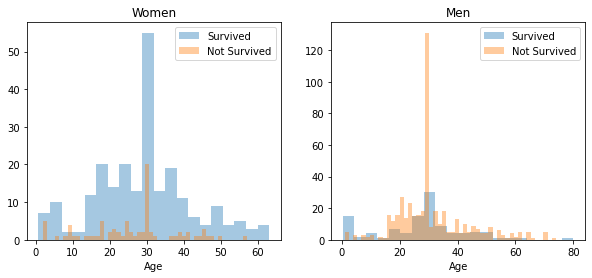

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']
ax = sns.distplot(a = women[women['Survived'] == 1].Age.dropna(), kde = False, 
                 label = 'Survived', ax = axes[0], bins=20)
ax = sns.distplot(a = women[women['Survived'] == 0].Age.dropna(), kde = False, 
                 label = 'Not Survived', ax = axes[0], bins=50)
ax.legend()
ax.set_title('Women')
ax = sns.distplot(a = men[men['Survived'] == 1].Age.dropna(), kde = False, 
                 label = 'Survived', ax = axes[1], bins=20)
ax = sns.distplot(a = men[men['Survived'] == 0].Age.dropna(), kde = False, 
                 label = 'Not Survived', ax = axes[1], bins=50)
ax.legend()
ax.set_title('Men')
plt.show()

As you can see, there is high probability that survived person is women 
and between 14 and and 40.
On the other hand men have low probability of surviving, especially between
5 and 17.
In general babies seem have more chance to survive.


Now let's look at relation between port of embarkation, sex and survival.




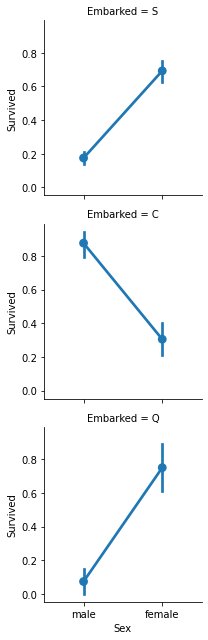

In [9]:
fg = sns.FacetGrid(df, row='Embarked')
fg.map(sns.pointplot, 'Sex', 'Survived',
               palette=None,  order=None, hue_order=None )

Graphs shows us there is correlation between gender and embarkation. Females who have embarked on Southampton and Queenstown have more chance to survive. Inversely, females who have embarked on Cherbourg have lower chance to survive according to other ports. Males have higher probability to survive if they have embarked on Cherbourg, but low probability if they embarked on Queenstown and Southampton.

Now let's look at whether or not there is relationship between
pclass and survival.

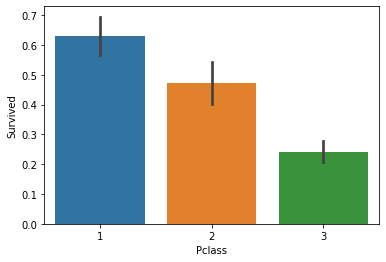

In [10]:
sns.barplot(x=df['Pclass'], y=df['Survived'])
plt.show()

As you can see in graph, higher classes have higher probability of surviving.

Now let's deep into Pclass and survival probabilities.

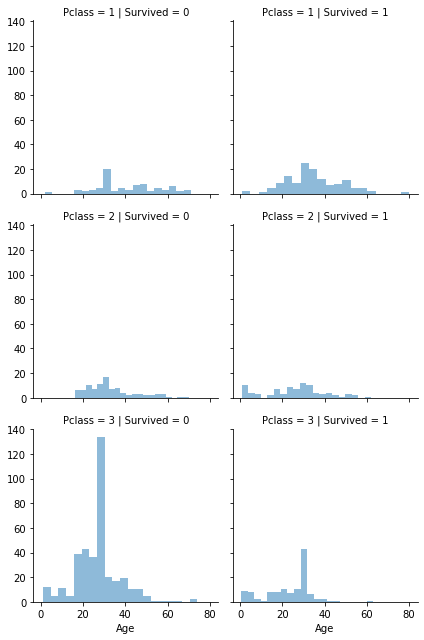

In [11]:
fg2 = sns.FacetGrid(df, col='Survived', row='Pclass')
fg2.map(plt.hist, 'Age', alpha=.5, bins=20)


Result shows us that passengers in class 1 have higher probability to survive and also passengers in class 3 have lower probability to survive.

Now let's look at sibsp and parch features. It is better if we combine because it makes more sense if we look at the relatives as whole.

In [12]:
data = [test_data, df]
for d in data:
    d['relatives'] = d['SibSp'] + d['Parch']
    d['relatives'].value_counts()

In [13]:
data = [test_data, df]
for d in data:
    d = d.drop(['SibSp','Parch'], axis = 1)
    d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   relatives    418 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-

In [14]:
data = [test_data, df]
for d in data:
    d['Age'] = d['Age'].astype(int)
    d['Fare'] = d['Fare'].fillna(0)
    d['Fare'] = d['Fare'].astype(int)
    d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    object
 11  relatives    418 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 39.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name

In [15]:
data = [test_data, df]
for d in data:
    d['Embarked'] = d['Embarked'].astype('category')
    d['embarked_cat'] = d['Embarked'].cat.codes
    d = d.drop(['Embarked'],axis=1)
    d.head()

We changed Embarked values into categorigal values in embarked_cat column. 0 corresponds to C, 1 corresponds to Q and 2 corresponds to S.

Now let's do the same operation to Sex column.

In [16]:
data = [test_data, df]
for d in data:
    d['Sex'] = d['Sex'].astype('category')
    d['sex_cat'] = d['Sex'].cat.codes
    d = d.drop(['Sex','Name'],axis=1)
    print(d)


test_data = test_data.drop(['Name','Cabin','Parch','Ticket','SibSp','Sex','Embarked'],axis=1)
df = df.drop(['Sex','Name','Embarked','SibSp','Parch'],axis=1)
df

     PassengerId  Pclass  Age  SibSp  Parch              Ticket  Fare Cabin  \
0            892       3   34      0      0              330911     7   NaN   
1            893       3   47      1      0              363272     7   NaN   
2            894       2   62      0      0              240276     9   NaN   
3            895       3   27      0      0              315154     8   NaN   
4            896       3   22      1      1             3101298    12   NaN   
..           ...     ...  ...    ...    ...                 ...   ...   ...   
413         1305       3   30      0      0           A.5. 3236     8   NaN   
414         1306       1   39      0      0            PC 17758   108  C105   
415         1307       3   38      0      0  SOTON/O.Q. 3101262     7   NaN   
416         1308       3   30      0      0              359309     8   NaN   
417         1309       3   30      1      1                2668    22   NaN   

    Embarked  relatives  embarked_cat  sex_cat  
0 

,Survived,Pclass,Age,Fare,relatives,embarked_cat,sex_cat
0,0,3,22,7,1,2,1
1,1,1,38,71,1,0,0
2,1,3,26,7,0,2,0
3,1,1,35,53,1,2,0
4,0,3,35,8,0,2,1
...,...,...,...,...,...,...,...
886,0,2,27,13,0,2,1
887,1,1,19,30,0,2,0
888,0,3,29,23,3,2,0
889,1,1,26,30,0,0,1


We changed male's to 1, females's to 0.

# Building Machine Learning Algortihms

In [17]:
X_train = df.drop(['Survived'],axis=1)
y_train = df['Survived']
X_test = test_data.drop(['PassengerId'],axis=1)


**k - Nearest Neighbors**

In [18]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_train, y_train)
print(knn_accuracy)

0.8383838383838383


**Linear Regression**

In [19]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
linreg_accuracy = linreg.score(X_train,y_train)
print(linreg_accuracy)

0.39719133628612935


**Logistic Regression**

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
logreg_accuracy = logreg.score(X_train,y_train)
print(logreg_accuracy)

0.8024691358024691


**Decision Tree**

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
tree_accuracy = tree.score(X_train,y_train)
print(tree_accuracy)

0.9607182940516273


**Random Forest**

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_accuracy = rf.score(X_train,y_train)
print(rf_accuracy)

0.9607182940516273


Since DecisionTreeClassifier and RandomForestClassfier have highest scores we can use one of them.